# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
df.dtypes

,0
satisfaction_level,float64
last_evaluation,float64
number_project,int64
average_montly_hours,int64
time_spend_company,int64
Work_accident,int64
left,int64
promotion_last_5years,int64
sales,object
salary,object


In [5]:
df.shape

(14999, 10)

In [6]:
df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
sales,0
salary,0


# Understand what kind of factors contributed most to employee turnover by EDA

In [7]:
df.dtypes

,0
satisfaction_level,float64
last_evaluation,float64
number_project,int64
average_montly_hours,int64
time_spend_company,int64
Work_accident,int64
left,int64
promotion_last_5years,int64
sales,object
salary,object


In [8]:
df['salary'].value_counts()

,count
salary,
low,7316
medium,6446
high,1237


In [9]:
df['salary'] = df['salary'].map({'low':0,'medium':1,'high':2}).astype(int)

In [10]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [11]:
df['sales'].value_counts()

,count
sales,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


In [12]:
df['sales'] = df['sales'].map({'RandD':0,'marketing':1,'product_mng':2,'IT':3,'management':4,'support':5,
                               'technical':6,'hr':7,'accounting':8,'sales':9}).astype(float)

In [13]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,9.0,0
1,0.80,0.86,5,262,6,0,1,0,9.0,1
2,0.11,0.88,7,272,4,0,1,0,9.0,1
3,0.72,0.87,5,223,5,0,1,0,9.0,0
4,0.37,0.52,2,159,3,0,1,0,9.0,0


In [14]:
df['sales'].value_counts()

,count
sales,
9.0,4140
6.0,2720
5.0,2229
3.0,1227
2.0,902
1.0,858
0.0,787
8.0,767
7.0,739


In [15]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,-0.015413,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.011855,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.005577,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.002387,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.001611,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,-0.019215,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,0.043814,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.015170,0.098119
sales,-0.015413,-0.011855,-0.005577,0.002387,0.001611,-0.019215,0.043814,-0.015170,1.000000,-0.033415
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,-0.033415,1.000000


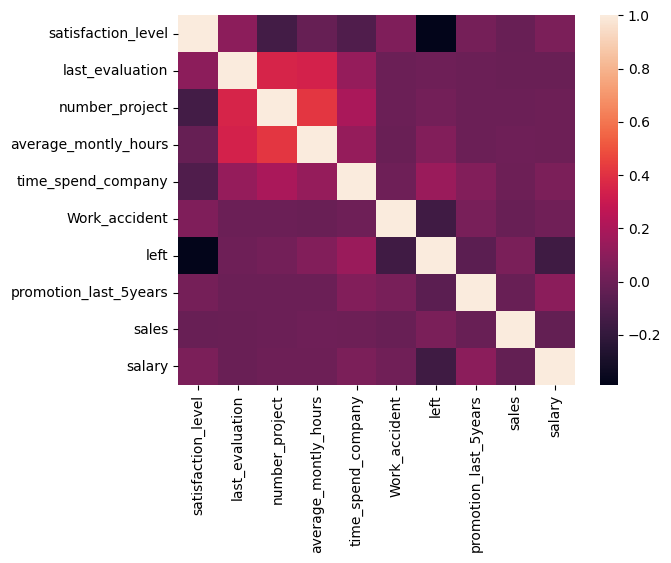

In [16]:
sns.heatmap(df.corr())
plt.show()

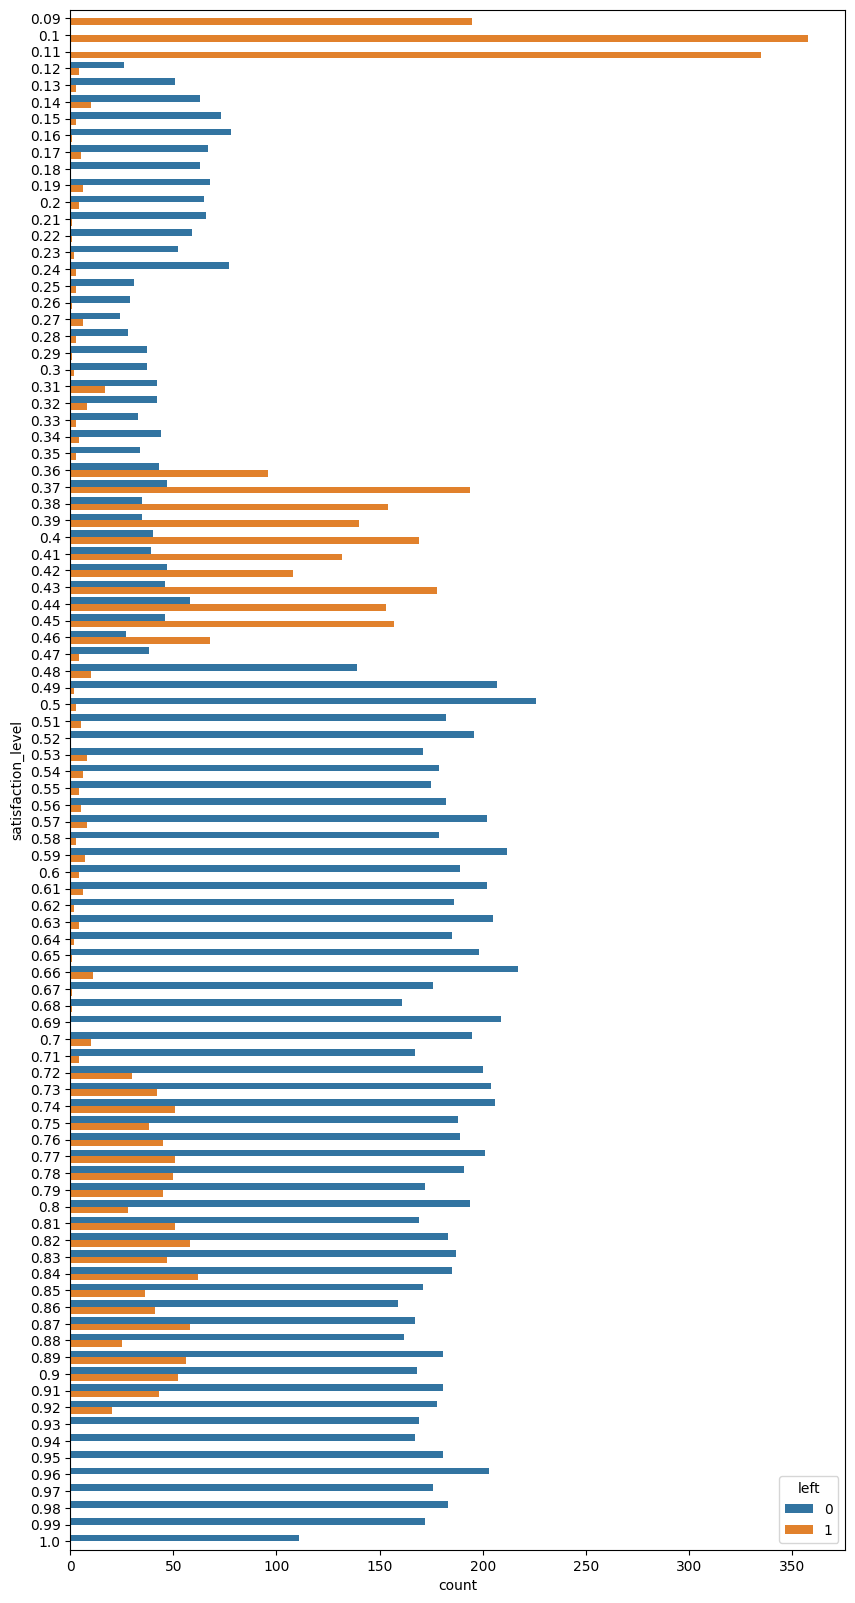

In [17]:
plt.figure(figsize=(10,20))
sns.countplot(y=df['satisfaction_level'],hue=df['left'])
plt.show()

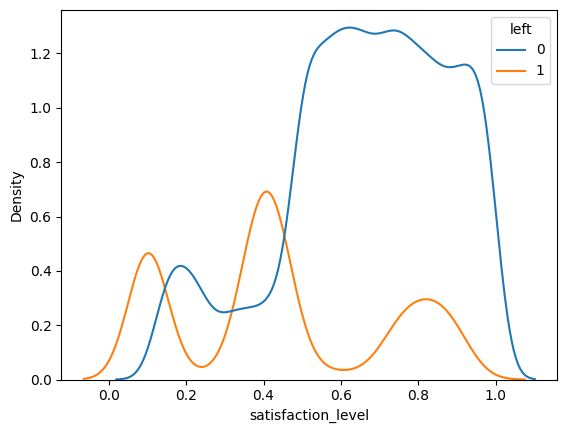

In [20]:
sns.kdeplot(data=df, x='satisfaction_level', hue='left')
plt.show()

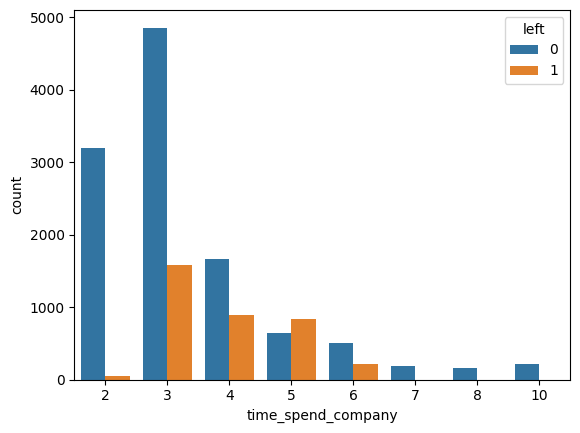

In [22]:
sns.countplot(data=df, x='time_spend_company', hue='left')
plt.show()

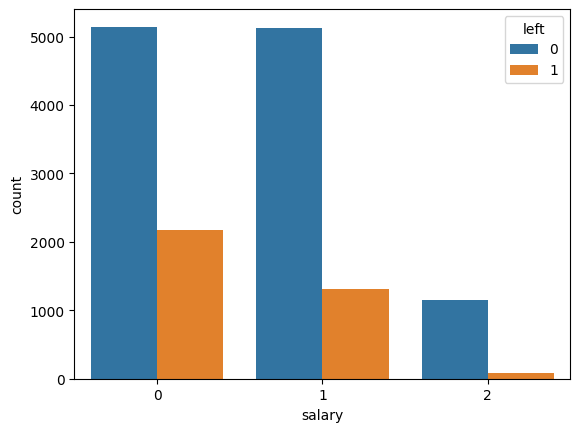

In [23]:
sns.countplot(data=df, x='salary', hue='left')
plt.show()

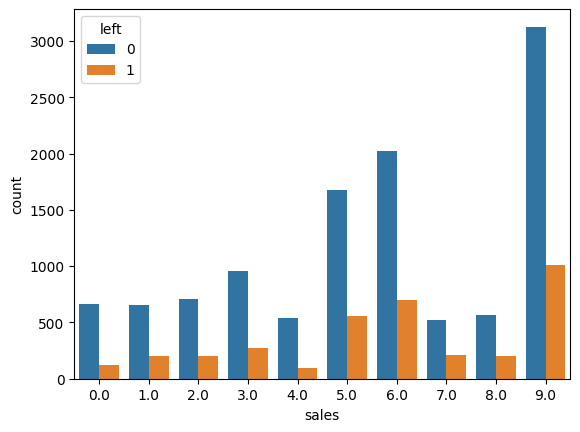

In [24]:
sns.countplot(data=df, x='sales', hue='left')
plt.show()

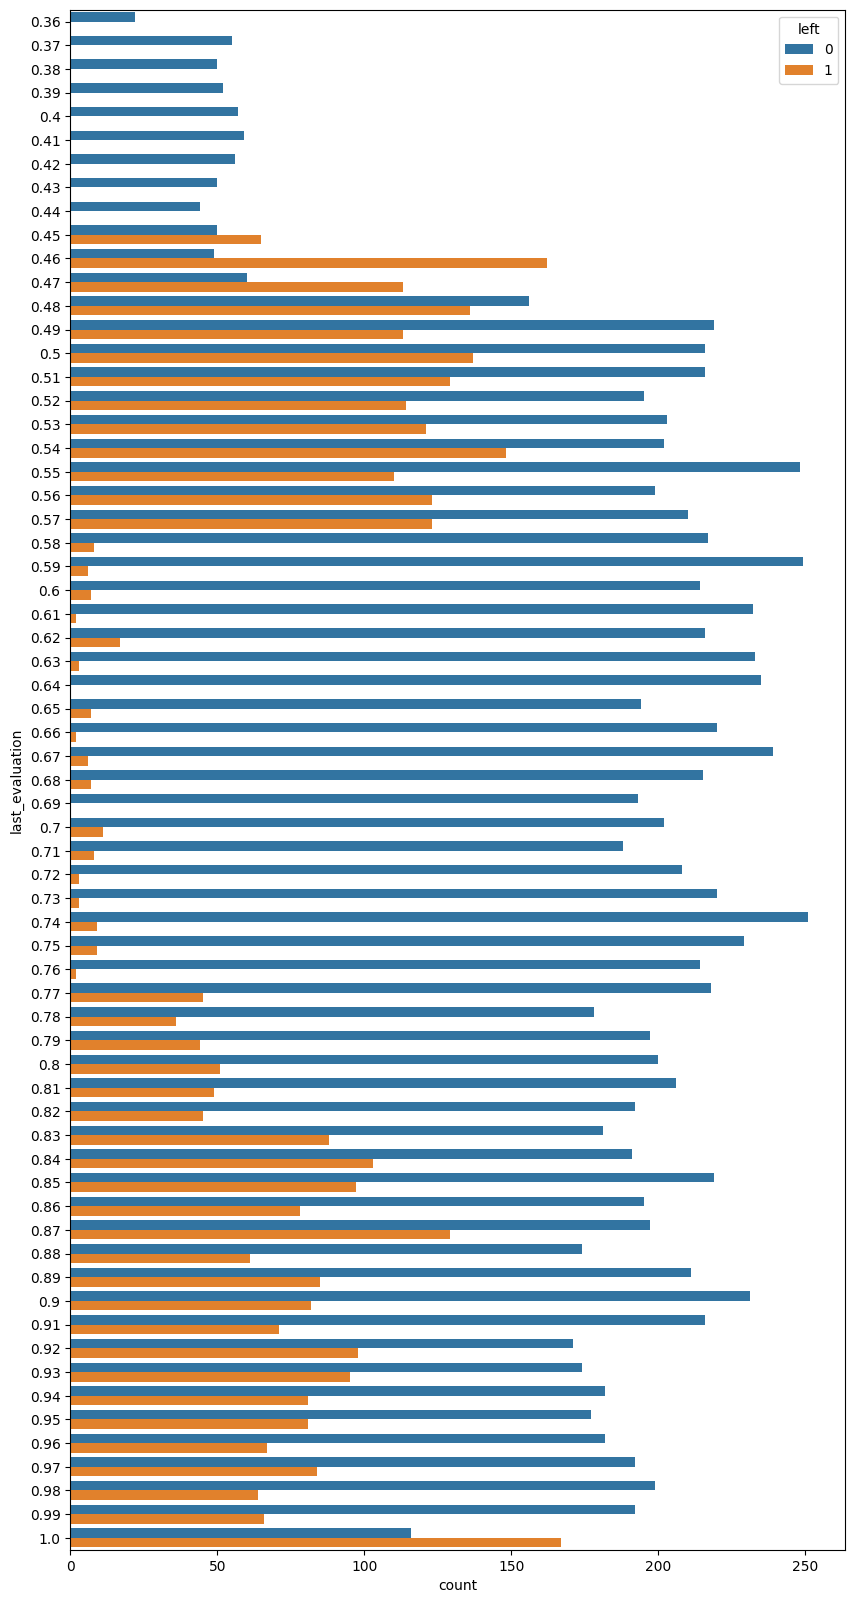

In [25]:
plt.figure(figsize=(10,20))
sns.countplot(y=df['last_evaluation'],hue=df['left'])
plt.show()

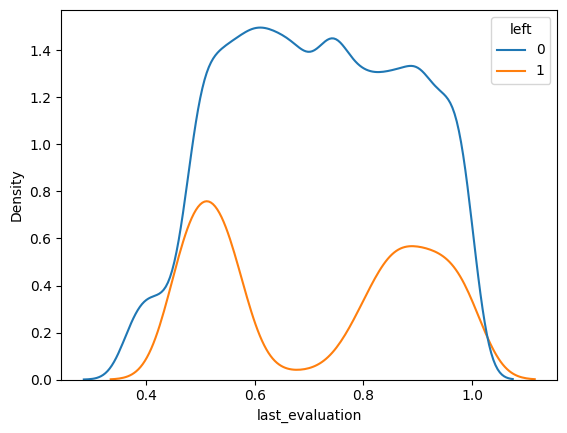

In [27]:
sns.kdeplot(data=df, x='last_evaluation', hue='left')
plt.show()

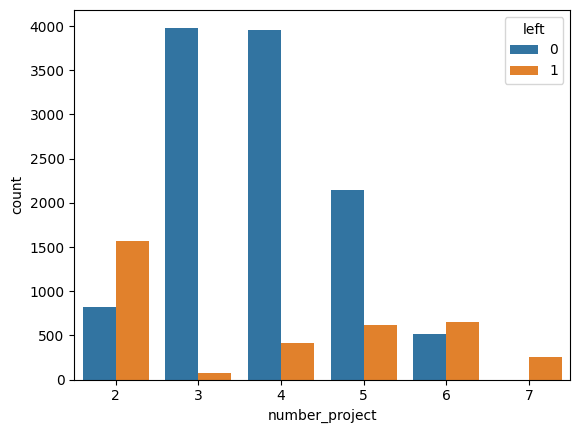

In [28]:
sns.countplot(data=df, x='number_project', hue='left')
plt.show()

<Axes: xlabel='average_montly_hours', ylabel='Density'>

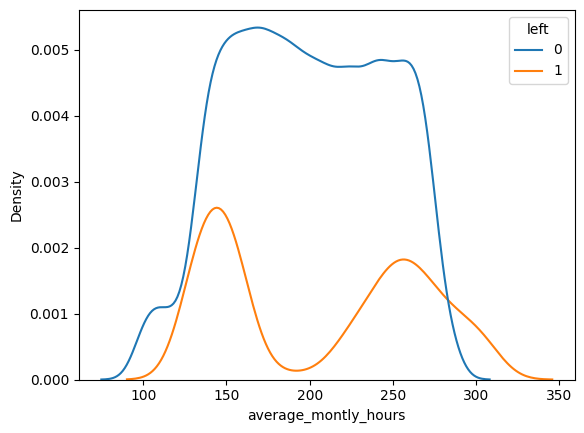

In [29]:
sns.kdeplot(data=df, x='average_montly_hours', hue='left')

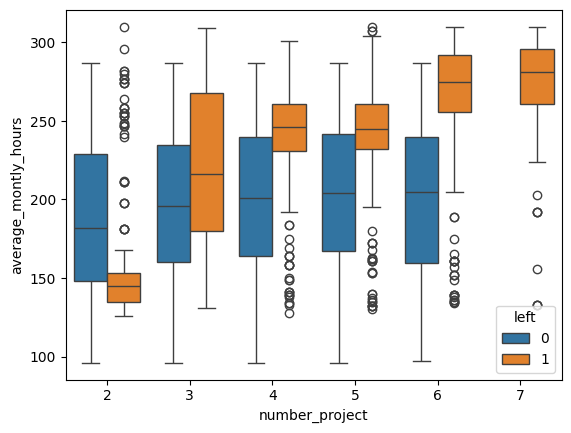

In [30]:
sns.boxplot(x=df['number_project'],y=df['average_montly_hours'],hue=df['left'])
plt.show()

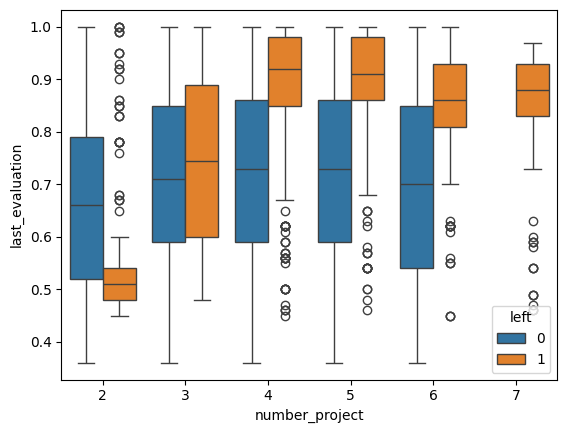

In [31]:
sns.boxplot(x=df['number_project'],y=df['last_evaluation'],hue=df['left'])
plt.show()

# Perform clustering of Employees who left based on their satisfaction and evaluation

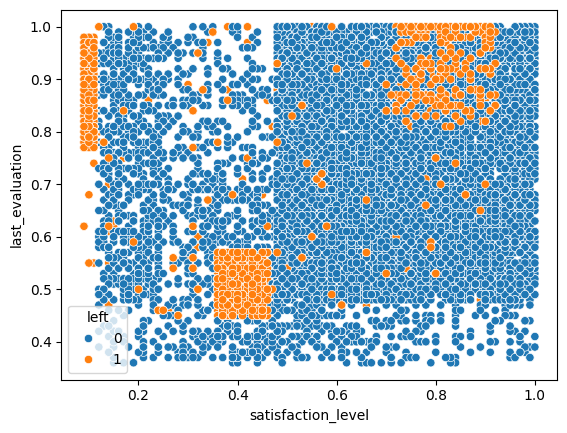

In [32]:
sns.scatterplot(x=df['satisfaction_level'],y=df['last_evaluation'],hue=df['left'])
plt.show()

<Axes: xlabel='time_spend_company', ylabel='count'>

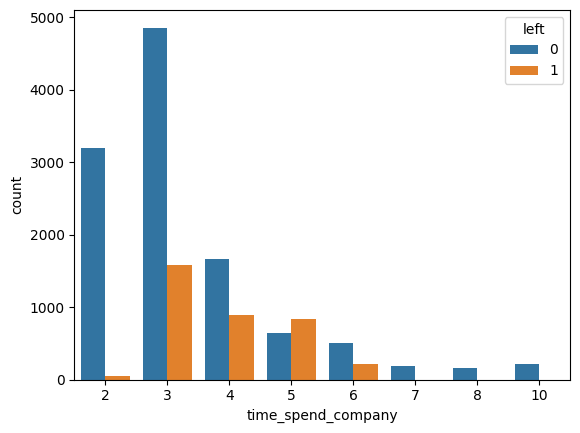

In [33]:
sns.countplot(x=df['time_spend_company'],hue=df['left'])

In [34]:
from sklearn.cluster import KMeans

In [35]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['satisfaction_level','last_evaluation']])
    sse.append(km.inertia_)

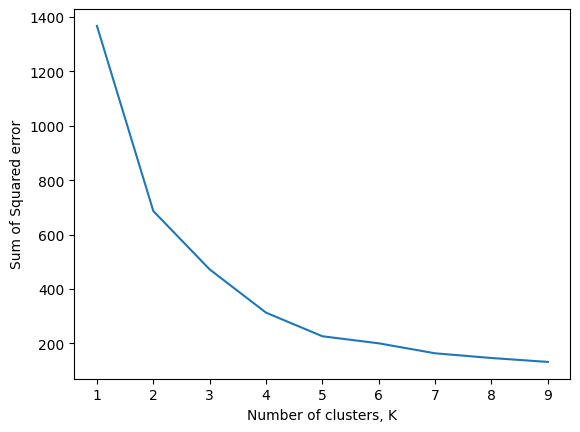

In [36]:
plt.xlabel('Number of clusters, K')
plt.ylabel('Sum of Squared error')
plt.plot(k_rng,sse)

# Handle the left Class Imbalance using SMOTE technique

In [37]:
df[['left','satisfaction_level']].groupby(['left'],as_index = False).mean().sort_values(by='satisfaction_level',ascending=False)

,left,satisfaction_level
0,0,0.666810
1,1,0.440098


In [38]:
df[['left','Work_accident']].groupby(['left'],as_index = False).mean().sort_values(by='Work_accident',ascending = False)

,left,Work_accident
0,0,0.175009
1,1,0.047326


In [39]:
df[['left','salary']].groupby(['salary'],as_index = False).mean().sort_values(by='left',ascending = False)

,salary,left
0,0,0.296884
1,1,0.204313
2,2,0.066289


In [40]:
df[['left','time_spend_company']].groupby(['time_spend_company'],as_index = False).mean().sort_values(by='left',ascending=False)

,time_spend_company,left
3,5,0.565513
2,4,0.348064
4,6,0.291086
1,3,0.246159
0,2,0.016338
5,7,0.000000
6,8,0.000000
7,10,0.000000


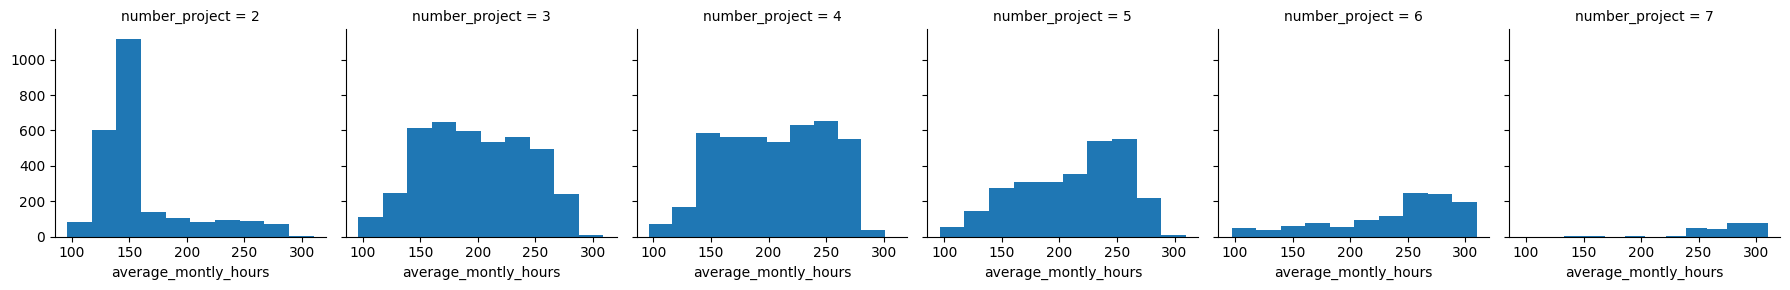

In [41]:
plot = sns.FacetGrid(df,col='number_project')
plot.map(plt.hist, 'average_montly_hours')
plt.show()

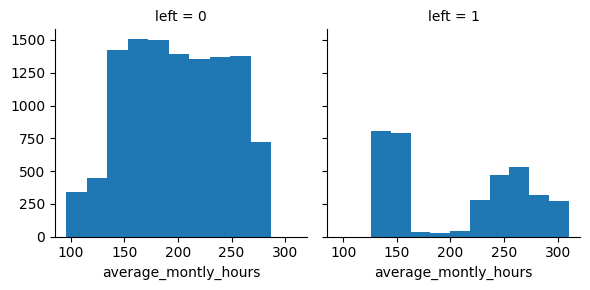

In [42]:
plot1 = sns.FacetGrid(df,col = 'left')
plot1.map(plt.hist,'average_montly_hours')
plt.show()

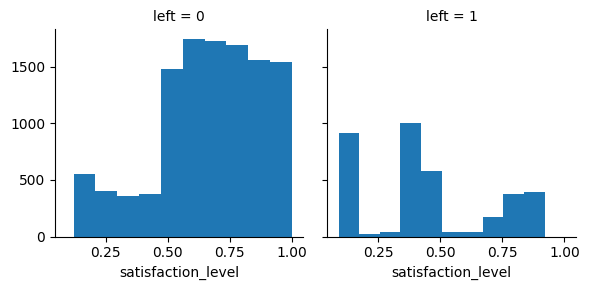

In [43]:
plot2 = sns.FacetGrid(df,col='left')
plot2.map(plt.hist,'satisfaction_level')
plt.show()

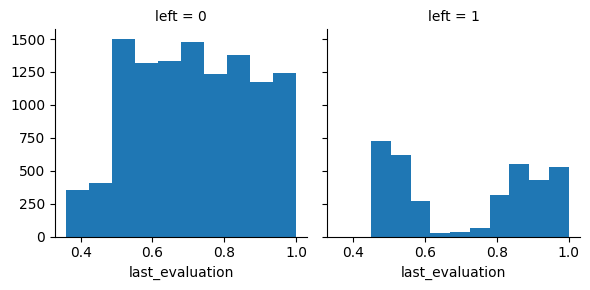

In [44]:
plot3 = sns.FacetGrid(df,col= 'left')
plot3.map(plt.hist,'last_evaluation')
plt.show()

In [45]:
df.loc[df['satisfaction_level'] <= 0.25, 'satisfaction_level'] = 0
df.loc[(df['satisfaction_level']> 0.25) & (df['satisfaction_level'] <= 0.5), 'satisfaction_level'] = 1
df.loc[(df['satisfaction_level']> 0.5) & (df['satisfaction_level'] <= 0.75), 'satisfaction_level'] = 0
df.loc[df['satisfaction_level'] > 0.75, 'satisfaction_level'] = 1
df['satisfaction_level'] = df['satisfaction_level'].astype(int)

In [46]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,1,0.53,2,157,3,0,1,0,9.0,0
1,1,0.86,5,262,6,0,1,0,9.0,1
2,0,0.88,7,272,4,0,1,0,9.0,1
3,0,0.87,5,223,5,0,1,0,9.0,0
4,1,0.52,2,159,3,0,1,0,9.0,0


In [47]:
df.loc[df['last_evaluation'] <= 0.56, 'last_evaluation'] = 0
df.loc[(df['last_evaluation'] > 0.56) & (df['last_evaluation'] <= 0.80), 'last_evaluation'] = 1
df.loc[df['last_evaluation'] > 0.80, 'last_evaluation'] = 0
df['last_evaluation'] = df['last_evaluation'].astype(int)

In [48]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,1,0,2,157,3,0,1,0,9.0,0
1,1,0,5,262,6,0,1,0,9.0,1
2,0,0,7,272,4,0,1,0,9.0,1
3,0,0,5,223,5,0,1,0,9.0,0
4,1,0,2,159,3,0,1,0,9.0,0


In [49]:
df['proj_hour'] = df.number_project * df.average_montly_hours
df.loc[:, ['proj_hour','number_project','average_montly_hours']].head(10)

,proj_hour,number_project,average_montly_hours
0,314,2,157
1,1310,5,262
2,1904,7,272
3,1115,5,223
4,318,2,159
5,306,2,153
6,1482,6,247
7,1295,5,259
8,1120,5,224
9,284,2,142


In [50]:
df= df.drop(['number_project','average_montly_hours'],axis=1)

In [51]:
df.head()

,satisfaction_level,last_evaluation,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,proj_hour
0,1,0,3,0,1,0,9.0,0,314
1,1,0,6,0,1,0,9.0,1,1310
2,0,0,4,0,1,0,9.0,1,1904
3,0,0,5,0,1,0,9.0,0,1115
4,1,0,3,0,1,0,9.0,0,318


# Perform k-fold cross-validation model training and evaluate performance

In [52]:
X = df.drop(['left'],axis=1)

In [53]:
y = df['left']

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
from sklearn.model_selection import cross_val_score, KFold

In [56]:
kfold = KFold(n_splits=10,random_state=7,shuffle=True)

In [57]:
modelCV = LogisticRegression(class_weight= 'balanced')

In [58]:
results = cross_val_score(modelCV,X,y,cv=kfold,scoring='roc_auc')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [59]:
print('Accuracy Score :',results.mean()*100)

Accuracy Score : 73.21985484762257


# Identify the best model and justify the evaluation metrics used

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
kfold = KFold(n_splits=10,random_state=7,shuffle=True)
model1 = RandomForestClassifier(n_estimators=100,max_features=3)

In [62]:
results2 = cross_val_score(model1,X,y,cv=kfold)

In [63]:
print('Accuracy Score :',results2.mean()*100)

Accuracy Score : 96.79981765621527


In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=152)

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
dtc = DecisionTreeClassifier()

In [68]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [69]:
y_pred = dtc.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [71]:
print('Accuracy Score :',accuracy_score(y_test,y_pred)*100)

Accuracy Score : 95.15555555555557


In [72]:
print(confusion_matrix(y_test,y_pred))

[[1642   64]
 [  45  499]]


In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1706
           1       0.89      0.92      0.90       544

    accuracy                           0.95      2250
   macro avg       0.93      0.94      0.93      2250
weighted avg       0.95      0.95      0.95      2250



In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=152)

In [75]:
from sklearn.svm import SVC

In [76]:
svc = SVC(kernel='rbf',gamma=0.1)

In [77]:
svc.fit(X_train,y_train)

SVC(gamma=0.1)

In [78]:
y_pred1 = svc.predict(X_test)

In [79]:
print('Accuracy Score :',accuracy_score(y_test,y_pred1)*100)

Accuracy Score : 92.44444444444444


In [80]:
print(confusion_matrix(y_test,y_pred1))

[[1640   66]
 [ 104  440]]


In [81]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1706
           1       0.87      0.81      0.84       544

    accuracy                           0.92      2250
   macro avg       0.90      0.89      0.89      2250
weighted avg       0.92      0.92      0.92      2250



In [82]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=152)

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
knn = KNeighborsClassifier(n_neighbors=3)

In [85]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [86]:
y_pred2 = knn.predict(X_test)

In [87]:
print('Accuracy Score :',accuracy_score(y_test,y_pred2)*100)

Accuracy Score : 91.68888888888888


In [88]:
print(confusion_matrix(y_test,y_pred2))

[[1590  116]
 [  71  473]]


In [89]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1706
           1       0.80      0.87      0.83       544

    accuracy                           0.92      2250
   macro avg       0.88      0.90      0.89      2250
weighted avg       0.92      0.92      0.92      2250



In [90]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=152)

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
rdc = RandomForestClassifier()

In [93]:
rdc.fit(X_train,y_train)

RandomForestClassifier()

In [94]:
y_pred3 = rdc.predict(X_test)

In [95]:
print('Accuracy Score :',accuracy_score(y_test,y_pred3)*100)

Accuracy Score : 95.6888888888889


In [96]:
print(confusion_matrix(y_test,y_pred3))

[[1651   55]
 [  42  502]]


In [97]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1706
           1       0.90      0.92      0.91       544

    accuracy                           0.96      2250
   macro avg       0.94      0.95      0.94      2250
weighted avg       0.96      0.96      0.96      2250



# Suggest various retention strategies for targeted employees

Employees generally left when they are underworked (less than 150hr/month or 6hr/day).  
Employees generally left when they are overworked (more than 250hr/month or 10hr/day).  
Employees with either really high or low evaluations should be taken into consideration for high turnover rate.  
Employees with low to medium salaries are the bulk of employee turnover.  
Employees that had 2,6, or 7 project count was at risk of leaving the company.  
Employee satisfaction is the highest indicator for employee turnover.  
Employee that had 4 and 5 yearsAtCompany should be taken into consideration for high turnover rate.  
Employee satisfaction, yearsAtCompany, and evaluation were the three biggest factors in determining turnover.  